In [45]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
train_data = pd.read_csv('../Classification/train_data_with_traffic_class.csv')
test_data = pd.read_csv('../Classification/test_data_with_traffic_class.csv')

full_data = pd.concat([train_data, test_data])

# Set style for visualizations
sns.set_theme(style='whitegrid')


   Month  Year         Country  Departures  Arrivals  Total Holidays  \
0      1  2000  United Kingdom     46677.0   45630.0        1.015023   
1      1  2000         Germany     23172.0   24251.0        1.015023   
2      1  2000          France     11098.0   11469.0        1.015023   
3      1  2000          Europe    118255.0  119735.0        1.015023   
4      1  2000         Oceania    139244.0  133358.0        1.015023   

   Inflation  Month_sin  Month_cos  Total_Traffic  Traffic_Class  
0  -0.600846        0.5   0.866025        92307.0              1  
1  -0.407217        0.5   0.866025        47423.0              1  
2  -0.278131        0.5   0.866025        22567.0              1  
3  -0.278131        0.5   0.866025       237990.0              1  
4  -0.278131        0.5   0.866025       272602.0              1  


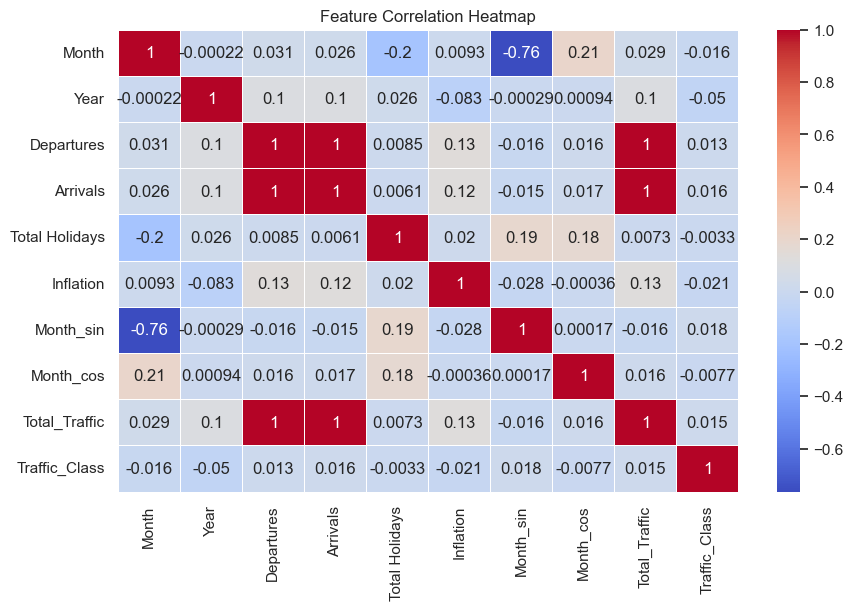

In [ ]:
#Corelation heat map between all features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

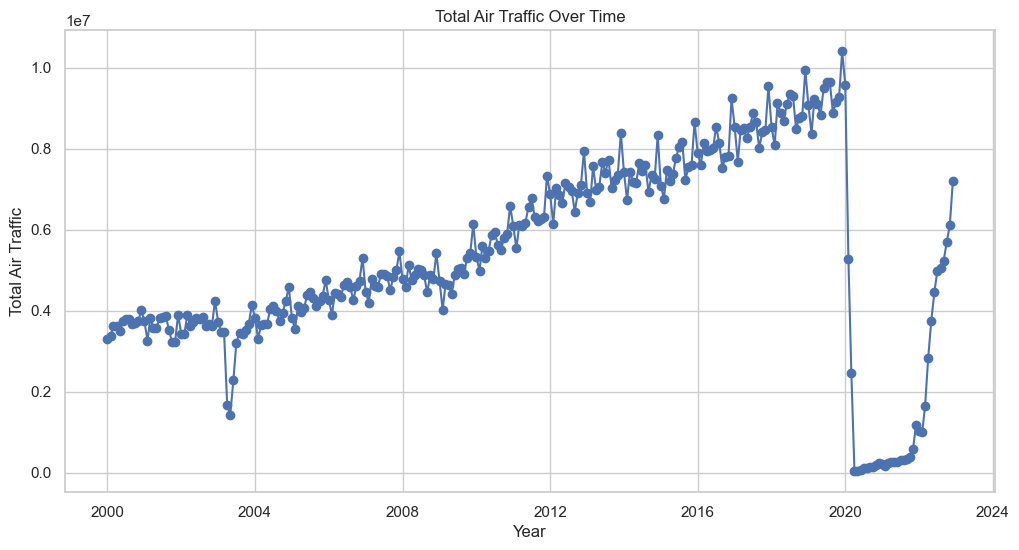

In [38]:
# Convert 'Year' and 'Month' into a datetime format
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))

# Aggregate Total_Traffic per month
df_monthly = df.groupby('Date')['Total_Traffic'].sum().reset_index()

# Plot time series
plt.figure(figsize=(12, 6))
plt.plot(df_monthly['Date'], df_monthly['Total_Traffic'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Air Traffic')
plt.title('Total Air Traffic Over Time')
plt.grid(True)
plt.show()

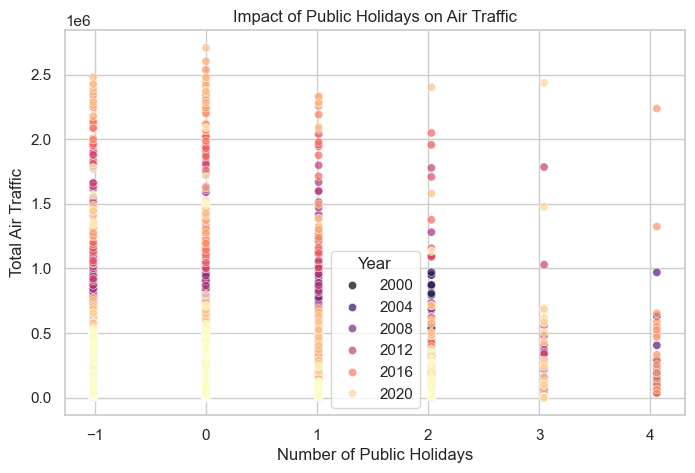

In [40]:
# Scatter plot: Public Holidays vs. Total Traffic
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Total Holidays', y='Total_Traffic', hue='Year', palette='magma', alpha=0.7)
plt.xlabel('Number of Public Holidays')
plt.ylabel('Total Air Traffic')
plt.title('Impact of Public Holidays on Air Traffic')
plt.grid(True)
plt.show()

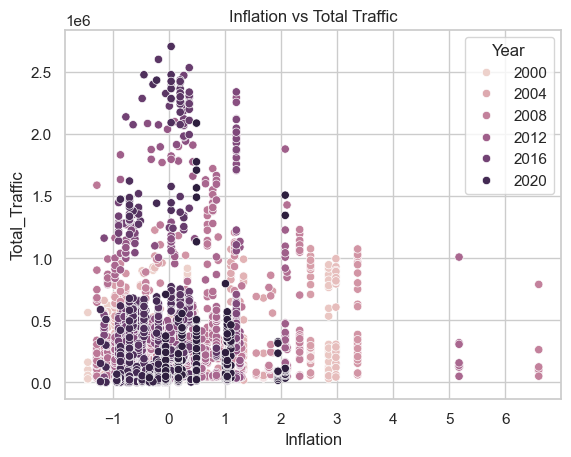

In [43]:
#Scatter plot: Inflation vs Total Traffic
sns.scatterplot(data=df, x="Inflation", y="Total_Traffic", hue="Year")
plt.title("Inflation vs Total Traffic")
plt.show()

(5414, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5414 entries, 0 to 448
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Month           5414 non-null   int64  
 1   Year            5414 non-null   int64  
 2   Country         5414 non-null   object 
 3   Departures      5414 non-null   float64
 4   Arrivals        5414 non-null   float64
 5   Total Holidays  5414 non-null   float64
 6   Inflation       5414 non-null   float64
 7   Month_sin       5414 non-null   float64
 8   Month_cos       5414 non-null   float64
 9   Total_Traffic   5414 non-null   float64
 10  Traffic_Class   5414 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 507.6+ KB
None
Month             0
Year              0
Country           0
Departures        0
Arrivals          0
Total Holidays    0
Inflation         0
Month_sin         0
Month_cos         0
Total_Traffic     0
Traffic_Class     0
dtype: in

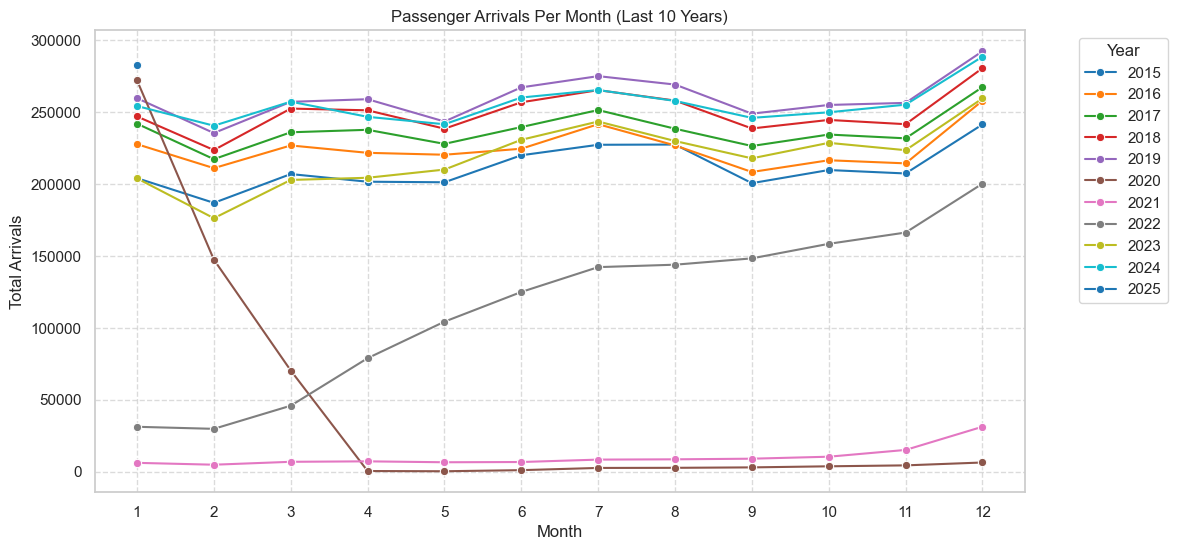

    Year  Month       Arrivals
60  2020      1  272087.555556
61  2020      2  147447.500000
62  2020      3   70378.444444
63  2020      4     503.705882
64  2020      5     346.941176
65  2020      6    1108.055556
66  2020      7    2649.166667
67  2020      8    2729.000000
68  2020      9    3034.222222
69  2020     10    3784.944444
70  2020     11    4433.611111
71  2020     12    6431.888889


In [48]:
# Check dataset shape and column names
print(full_data.shape)
#Exploring Data Types
print(full_data.info())
#Check for Missing Values
print(df.isnull().sum())
#Arrivals over the years
recent_years = full_data[full_data["Year"] >= 2015]  # Last 10 years
monthly_totals_recent = recent_years.groupby(["Year", "Month"])["Arrivals"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_totals_recent, x="Month", y="Arrivals", hue="Year", marker="o", palette="tab10")
plt.title("Passenger Arrivals Per Month (Last 10 Years)")
plt.xlabel("Month")
plt.ylabel("Total Arrivals")
plt.xticks(range(1, 13))
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

print(monthly_totals_recent[monthly_totals_recent["Year"] == 2020])